In [1]:
import networkx as nx

from lattice_surgery_schedule import LatticeSurgerySchedule

In [2]:
device = [[(r, c) for c in range(4)] for r in range(8)]

In [3]:
schedule = LatticeSurgerySchedule()

In [4]:
schedule.add_op([(0,0), (0,1), (0,2), (0,3), (2,0), (2,1), (2,2), (2,4)], [(1,0), (1,1), (1,2), (1,3), (1,4)], advance_time=True)
schedule.add_op([(0,0), (0,1), (0,4), (0,5), (2,0), (2,1), (2,3), (2,5)], [(1,0), (1,1), (1,2), (1,3), (1,4), (1,5)], advance_time=True)
schedule.add_op([(0,0), (0,2), (0,4), (0,6), (2,0), (2,2), (2,3), (2,6)], [(1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6)], advance_time=True)
schedule.add_op([(0,0), (0,3), (0,5), (0,6), (2,1), (2,2), (2,3), (2,7)], [(1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7)], advance_time=True)
schedule.add_op([(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7)], [(1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7)])
schedule.inject_T((1,1))
schedule.inject_T((1,2))
schedule.inject_T((1,3))
schedule.inject_T((1,4))
schedule.inject_T((1,5))
schedule.inject_T((1,6))
schedule.inject_T((1,7))
schedule.inject_T((3,0))
schedule.inject_T((3,1))
schedule.inject_T((3,2))
schedule.inject_T((3,3))
schedule.inject_T((3,4))
schedule.inject_T((3,5))
schedule.inject_T((3,6))
schedule.inject_T((3,7))
schedule.add_op([(1,1), (0,1)], [])
schedule.add_op([(1,2), (0,2)], [])
schedule.add_op([(1,3), (0,3)], [])
schedule.add_op([(1,4), (0,4)], [])
schedule.add_op([(1,5), (0,5)], [])
schedule.add_op([(1,6), (0,6)], [])
schedule.add_op([(1,7), (0,7)], [])
schedule.add_op([(3,0), (2,0)], [])
schedule.add_op([(3,1), (2,1)], [])
schedule.add_op([(3,2), (2,2)], [])
schedule.add_op([(3,3), (2,3)], [])
schedule.add_op([(3,4), (2,4)], [])
schedule.add_op([(3,5), (2,5)], [])
schedule.add_op([(3,6), (2,6)], [])
schedule.add_op([(3,7), (2,7)], [])
schedule.conditional_S((0,1), 20)
schedule.conditional_S((0,2), 21)
schedule.conditional_S((0,3), 22)
schedule.conditional_S((0,4), 23)
schedule.conditional_S((0,5), 24)
schedule.conditional_S((0,6), 25)
schedule.conditional_S((0,7), 26)
schedule.conditional_S((2,0), 27)
schedule.conditional_S((2,1), 28)
schedule.conditional_S((2,2), 29)
schedule.conditional_S((2,3), 30)
schedule.conditional_S((2,4), 31)
schedule.conditional_S((2,5), 32)
schedule.conditional_S((2,6), 33)
schedule.conditional_S((2,7), 34)

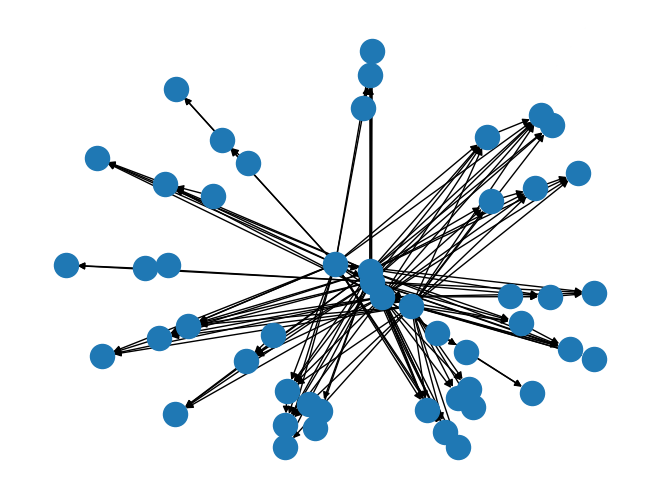

In [5]:
nx.draw(schedule.to_dag())

In [6]:
list(nx.topological_generations(schedule.to_dag()))

[[0, 12, 13, 14, 15, 16, 17, 18, 19],
 [1, 31],
 [2, 32, 46],
 [3, 27, 33, 47],
 [4, 28, 29, 30, 34, 42, 48],
 [5, 6, 7, 8, 9, 10, 11, 43, 44, 45, 49],
 [20, 21, 22, 23, 24, 25, 26],
 [35, 36, 37, 38, 39, 40, 41]]

In [7]:
from device_manager import DeviceManager

In [8]:
dm = DeviceManager(2, schedule)

In [9]:
dm.get_next_round(set(range(len(schedule.all_instructions))))

[((0, 0), 0, 0),
 ((0, 1), 0, 0),
 ((0, 2), 0, 0),
 ((0, 3), 0, 0),
 ((2, 0), 0, 0),
 ((2, 1), 0, 0),
 ((2, 2), 0, 0),
 ((2, 4), 0, 0),
 ((1, 0), 0, 0),
 ((1, 1), 0, 0),
 ((1, 2), 0, 0),
 ((1, 3), 0, 0),
 ((1, 4), 0, 0),
 ((3, 0), 0, 12),
 ((3, 1), 0, 13),
 ((3, 2), 0, 14),
 ((3, 3), 0, 15),
 ((3, 4), 0, 16),
 ((3, 5), 0, 17),
 ((3, 6), 0, 18),
 ((3, 7), 0, 19)]

In [13]:
{1,2,3} | {4,5,6}

{1, 2, 3, 4, 5, 6}

In [10]:
dm.get_next_round(set(range(len(schedule.all_instructions))))

[((0, 0), 1, 0),
 ((0, 1), 1, 0),
 ((0, 2), 1, 0),
 ((0, 3), 1, 0),
 ((2, 0), 1, 0),
 ((2, 1), 1, 0),
 ((2, 2), 1, 0),
 ((2, 4), 1, 0),
 ((1, 0), 1, 0),
 ((1, 1), 1, 0),
 ((1, 2), 1, 0),
 ((1, 3), 1, 0),
 ((1, 4), 1, 0),
 ((3, 0), 1, 12),
 ((3, 1), 1, 13),
 ((3, 2), 1, 14),
 ((3, 3), 1, 15),
 ((3, 4), 1, 16),
 ((3, 5), 1, 17),
 ((3, 6), 1, 18),
 ((3, 7), 1, 19)]

In [11]:
adm.get_next_round({})

NameError: name 'adm' is not defined

In [ ]:
dm.get_next_round({})

[((3, 5), 32),
 ((2, 5), 32),
 ((0, 0), 2),
 ((0, 2), 2),
 ((0, 4), 2),
 ((0, 6), 2),
 ((2, 0), 2),
 ((2, 2), 2),
 ((2, 3), 2),
 ((2, 6), 2),
 ((1, 0), 2),
 ((1, 1), 2),
 ((1, 2), 2),
 ((1, 3), 2),
 ((1, 4), 2),
 ((1, 5), 2),
 ((1, 6), 2),
 ((2, 4), 46)]

In [ ]:
dm.get_next_round({31})

[((2, 4), 46),
 ((3, 0), 27),
 ((2, 0), 27),
 ((3, 6), 33),
 ((2, 6), 33),
 ((0, 0), 3),
 ((0, 3), 3),
 ((0, 5), 3),
 ((0, 6), 3),
 ((2, 1), 3),
 ((2, 2), 3),
 ((2, 3), 3),
 ((2, 7), 3),
 ((1, 0), 3),
 ((1, 1), 3),
 ((1, 2), 3),
 ((1, 3), 3),
 ((1, 4), 3),
 ((1, 5), 3),
 ((1, 6), 3),
 ((1, 7), 3),
 ((2, 5), 47)]

In [ ]:
dm._completed_instructions

{0, 12, 13, 14, 15, 16, 17, 18, 19}

In [ ]:
dm._active_instructions

{1: 2, 31: 2}

In [ ]:
dm._instruction_frontier

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49}